# Predict Fuel Efficiency

 POINTS TO BE NOTED

*   Auto MPG dataset is used  to create a model to predict fuel efficiency of vehicles in the late 1970s and early 1980
*  For the fuel efficency as one of the feature which is going to be predicted we will provide other important features like cylinders, displacement, horsepower and weight of the Vehicle during that period of time .




In [2]:
!pip install tensorflow

In [99]:
#Import Basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import pickle
%matplotlib inline 

In [29]:
#after downloading dataset from the file commited below 
#import the data set using pandas 
dataset=pd.read_csv(r'C:\Users\gupta\Desktop\data.csv',na_values="?")

In [30]:
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [77]:
dataset.dropna(axis=0,inplace=True)

In [78]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [80]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [81]:
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [82]:
dataset.drop(["car name"],axis=1,inplace=True)

KeyError: "['car name'] not found in axis"

In [83]:
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


C:\Users\gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


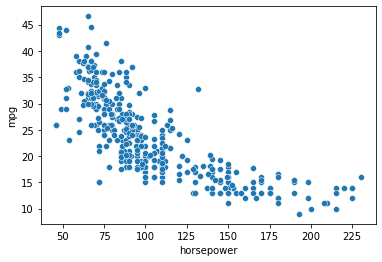

In [84]:
sns.scatterplot(dataset["horsepower"],dataset["mpg"])
plt.show()


In [85]:
X=dataset.drop(["mpg"],axis=1,inplace=False)
y=dataset["mpg"]

In [86]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [87]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [88]:
X.shape

(392, 7)

In [89]:
y.shape

(392,)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [92]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
258,6,231.0,105.0,3380,15.8,78,1
212,8,350.0,180.0,4380,12.1,76,1
346,4,97.0,67.0,2065,17.8,81,3
71,3,70.0,97.0,2330,13.5,72,3
191,6,225.0,100.0,3233,15.4,76,1
...,...,...,...,...,...,...,...
64,8,318.0,150.0,4135,13.5,72,1
328,4,146.0,67.0,3250,21.8,80,2
341,6,173.0,110.0,2725,12.6,81,1
11,8,340.0,160.0,3609,8.0,70,1


In [93]:
#standard scaler 
from sklearn.preprocessing import StandardScaler

In [94]:
sc=StandardScaler()


In [95]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)


In [96]:
X_train_std

array([[ 0.37363496,  0.42153535,  0.06049357, ...,  0.03181711,
         0.51946626, -0.7593761 ],
       [ 1.55037035,  1.57170955,  1.98784692, ..., -1.2688355 ,
        -0.02797126, -0.7593761 ],
       [-0.80310043, -0.87361879, -0.91603212, ...,  0.73487257,
         1.34062255,  1.70297954],
       ...,
       [ 0.37363496, -0.13905375,  0.18898379, ..., -1.09307164,
         1.34062255, -0.7593761 ],
       [ 1.55037035,  1.47505625,  1.47388602, ..., -2.71009921,
        -1.67028383, -0.7593761 ],
       [-0.80310043, -0.76730016, -0.71044777, ...,  0.38334484,
         1.34062255,  1.70297954]])

In [101]:
pickle.dump(sc,open(r"C:\Users\gupta\scaler.pkl","wb"))

In [107]:
#build the model
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense,Flatten,Dropout,Activation

In [106]:
model=Sequential()

In [109]:
#adding input layers 
model.add(Dense(units=128,activation="relu",input_shape=[7]))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=256,activation="relu"))

#adding the output layer 
model.add(Dense(units=1))

In [121]:
#compile the model
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_squared_error","mean_absolute_error"])

In [122]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [123]:
model.fit(X_train_std,y_train,batch_size=20,epochs=10)

Epoch 1/10
14/14 [==============================] - 2s 5ms/step - loss: 16.2041 - mean_squared_error: 16.2041 - mean_absolute_error: 3.1669
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 8.7059 - mean_squared_error: 8.7059 - mean_absolute_error: 2.1375
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 9.7010 - mean_squared_error: 9.7010 - mean_absolute_error: 2.3561
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 7.8504 - mean_squared_error: 7.8504 - mean_absolute_error: 1.9747
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 12.8320 - mean_squared_error: 12.8320 - mean_absolute_error: 2.5667
Epoch 6/10
14/14 [==============================] - 0s 7ms/step - loss: 7.3955 - mean_squared_error: 7.3955 - mean_absolute_error: 1.9557
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 8.7480 - mean_squared_error: 8.7480 - mean_absolute_error: 2.1625
Epoch 8/10
14/14 [============

In [125]:
t=model.evaluate(X_test_std,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 6.4386 - mean_squared_error: 6.4386 - mean_absolute_error: 1.8801


In [126]:
predictions=model.predict(X_test_std)

In [127]:
predictions


array([[12.821471 ],
       [18.920055 ],
       [18.137178 ],
       [30.882421 ],
       [16.287539 ],
       [17.646097 ],
       [30.422598 ],
       [18.304398 ],
       [20.524849 ],
       [23.13703  ],
       [25.82043  ],
       [24.446972 ],
       [29.737535 ],
       [34.717693 ],
       [25.022543 ],
       [22.11732  ],
       [13.717337 ],
       [23.86602  ],
       [12.405981 ],
       [16.19429  ],
       [27.993164 ],
       [19.661327 ],
       [18.097937 ],
       [15.118281 ],
       [31.9165   ],
       [28.40916  ],
       [25.048595 ],
       [12.777032 ],
       [22.892365 ],
       [13.800043 ],
       [36.33749  ],
       [35.55058  ],
       [29.077736 ],
       [29.650814 ],
       [30.326452 ],
       [21.916557 ],
       [24.602055 ],
       [14.605015 ],
       [12.7193   ],
       [28.366669 ],
       [30.081703 ],
       [19.181849 ],
       [14.575542 ],
       [12.953787 ],
       [12.749728 ],
       [23.018387 ],
       [26.90881  ],
       [17.26

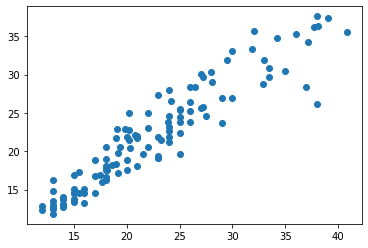

In [131]:
plt.scatter(y_test,predictions)
plt.show()

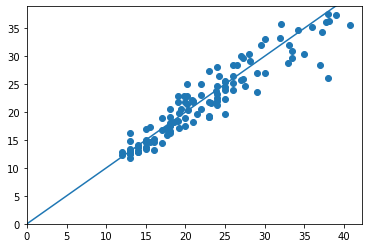

In [133]:
plt.scatter(y_test,predictions)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])

In [134]:
list1=[[8,350,165,3693,11.5,70,1]]
list1=sc.transform(list1)
list1

array([[ 1.55037035,  1.57170955,  1.60237625,  0.89644554, -1.47975214,
        -1.67028383, -0.7593761 ]])

In [135]:
prediction2=model.predict(list1)

In [137]:
prediction2

array([[13.928614]], dtype=float32)